In [1]:
import matplotlib.pyplot as plt
import csv


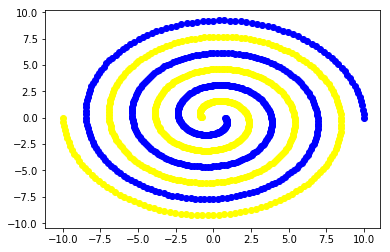

In [11]:
# taken from two-spirals.c by Matt White
import math

def create_spiral_dataset(density=1, maxRadius=6.5):
    x_spiral = []
    y_spiral = []
    points = 96 * density # total number of points to generate
    
    for num in range(points):
        # Angle is based on the current iteration times pi/16, divided by density
        angle = (num * math.pi) / ( 16.0 * density)
        
        # Radius is the maximum radius times the fraction of iterations left
        radius = maxRadius * ( (104.0 * density) - num) / (104.0 * density)
        
        # calculate x and y based on cos and sin, according to the paper
        x = radius * math.cos(angle)
        y = radius * math.sin(angle)
        
        x_spiral.append([x, y]) # non mirror point
        y_spiral.append([0]) # label for non mirror
        x_spiral.append([-x, -y]) # mirroring point for the spiral that goes the other way around
        y_spiral.append([1]) # label mirror
        
    return x_spiral, y_spiral

x, y = create_spiral_dataset(density=5, maxRadius=10)

blue_x = []
blue_y = []
yellow_x = []
yellow_y = []

for idx, point in enumerate(x):
    if y[idx][0] == 0:
        # non-mirror, blue
        blue_x.append(point[0])
        blue_y.append(point[1])
    else:
        yellow_x.append(point[0])
        yellow_y.append(point[1])

plt.scatter(blue_x, blue_y, color='blue')
plt.scatter(yellow_x, yellow_y, color='yellow')

plt.show()

        

In [16]:
import tensorflow as tf
import numpy as np

# convert dataset into numpy array
np_x = np.array(x) # features 
np_y = np.array(y) # labels

print(np_x.shape)
print(np_y.shape)

(960, 2)
(960, 1)


In [19]:
# placeholders for data
x_pl = tf.placeholder(tf.float32, np_x.shape, name='feature_inputs')
y_pl = tf.placeholder(tf.float32, np_y.shape, name='labels')

l0_units = 10

# Neural Network
# 1st layer
l0_w = tf.Variable(tf.random_normal([2, l0_units]))
l0_b = tf.Variable(tf.random_normal([l0_units]))
l0 = tf.nn.sigmoid(tf.add(tf.matmul(x_pl, l0_w), l0_b))

# 2nd layer
l1_w = tf.Variable(tf.random_normal([l0_units, 1]))
l1_b = tf.Variable(tf.random_normal([1]))
l1 = tf.nn.sigmoid(tf.add(tf.matmul(l0, l1_w), l1_b))

# cost function
cost = tf.reduce_mean(tf.losses.mean_squared_error(labels=y_pl, predictions=l1))

# optimizer algorithm
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [21]:
# Required: Run previous cell to create the neural network model
# training
n_epochs = 5000

errors = []

with tf.Session() as sess:
    # tf.global_variables_initializer().run()
    
    sess.run(tf.global_variables_initializer())
    for i in range(n_epochs):
        _, error = sess.run([optimizer, cost], feed_dict={x_pl: np_x, y_pl: np_y})
        errors.append(error)
        print('epoch: ', i, 'error: ', error)

epoch:  0 error:  0.30270007
epoch:  1 error:  0.30259866
epoch:  2 error:  0.3024973
epoch:  3 error:  0.30239576
epoch:  4 error:  0.30229446
epoch:  5 error:  0.30219296
epoch:  6 error:  0.30209157
epoch:  7 error:  0.30199012
epoch:  8 error:  0.30188876
epoch:  9 error:  0.3017872
epoch:  10 error:  0.30168578
epoch:  11 error:  0.30158442
epoch:  12 error:  0.30148292
epoch:  13 error:  0.30138144
epoch:  14 error:  0.30128005
epoch:  15 error:  0.30117857
epoch:  16 error:  0.30107716
epoch:  17 error:  0.30097568
epoch:  18 error:  0.3008742
epoch:  19 error:  0.30077282
epoch:  20 error:  0.30067134
epoch:  21 error:  0.30056998
epoch:  22 error:  0.30046856
epoch:  23 error:  0.30036724
epoch:  24 error:  0.30026576
epoch:  25 error:  0.30016443
epoch:  26 error:  0.3000631
epoch:  27 error:  0.29996175
epoch:  28 error:  0.2998604
epoch:  29 error:  0.2997591
epoch:  30 error:  0.29965773
epoch:  31 error:  0.2995565
epoch:  32 error:  0.29945526
epoch:  33 error:  0.299354

epoch:  397 error:  0.27061623
epoch:  398 error:  0.27056947
epoch:  399 error:  0.27052283
epoch:  400 error:  0.27047628
epoch:  401 error:  0.27043006
epoch:  402 error:  0.27038392
epoch:  403 error:  0.27033794
epoch:  404 error:  0.27029213
epoch:  405 error:  0.2702465
epoch:  406 error:  0.270201
epoch:  407 error:  0.2701558
epoch:  408 error:  0.27011058
epoch:  409 error:  0.27006567
epoch:  410 error:  0.27002084
epoch:  411 error:  0.2699762
epoch:  412 error:  0.26993164
epoch:  413 error:  0.26988742
epoch:  414 error:  0.26984322
epoch:  415 error:  0.26979923
epoch:  416 error:  0.26975545
epoch:  417 error:  0.2697117
epoch:  418 error:  0.26966828
epoch:  419 error:  0.2696249
epoch:  420 error:  0.2695817
epoch:  421 error:  0.26953867
epoch:  422 error:  0.2694958
epoch:  423 error:  0.2694531
epoch:  424 error:  0.2694105
epoch:  425 error:  0.2693681
epoch:  426 error:  0.26932585
epoch:  427 error:  0.26928383
epoch:  428 error:  0.26924187
epoch:  429 error:  

epoch:  761 error:  0.2612304
epoch:  762 error:  0.2612178
epoch:  763 error:  0.26120523
epoch:  764 error:  0.26119262
epoch:  765 error:  0.26118013
epoch:  766 error:  0.2611677
epoch:  767 error:  0.26115525
epoch:  768 error:  0.26114288
epoch:  769 error:  0.26113054
epoch:  770 error:  0.26111826
epoch:  771 error:  0.26110592
epoch:  772 error:  0.26109374
epoch:  773 error:  0.26108155
epoch:  774 error:  0.26106942
epoch:  775 error:  0.26105726
epoch:  776 error:  0.2610452
epoch:  777 error:  0.26103318
epoch:  778 error:  0.26102114
epoch:  779 error:  0.2610092
epoch:  780 error:  0.26099724
epoch:  781 error:  0.26098537
epoch:  782 error:  0.2609735
epoch:  783 error:  0.26096168
epoch:  784 error:  0.2609499
epoch:  785 error:  0.26093814
epoch:  786 error:  0.26092649
epoch:  787 error:  0.2609148
epoch:  788 error:  0.26090318
epoch:  789 error:  0.26089156
epoch:  790 error:  0.26088002
epoch:  791 error:  0.26086846
epoch:  792 error:  0.260857
epoch:  793 error:

epoch:  1102 error:  0.25848866
epoch:  1103 error:  0.25848356
epoch:  1104 error:  0.2584785
epoch:  1105 error:  0.2584735
epoch:  1106 error:  0.25846845
epoch:  1107 error:  0.25846338
epoch:  1108 error:  0.25845844
epoch:  1109 error:  0.25845343
epoch:  1110 error:  0.25844845
epoch:  1111 error:  0.25844347
epoch:  1112 error:  0.25843844
epoch:  1113 error:  0.2584335
epoch:  1114 error:  0.2584286
epoch:  1115 error:  0.25842363
epoch:  1116 error:  0.2584187
epoch:  1117 error:  0.2584138
epoch:  1118 error:  0.25840893
epoch:  1119 error:  0.258404
epoch:  1120 error:  0.2583991
epoch:  1121 error:  0.2583942
epoch:  1122 error:  0.25838935
epoch:  1123 error:  0.25838456
epoch:  1124 error:  0.25837964
epoch:  1125 error:  0.2583748
epoch:  1126 error:  0.25837004
epoch:  1127 error:  0.25836527
epoch:  1128 error:  0.25836036
epoch:  1129 error:  0.2583556
epoch:  1130 error:  0.2583508
epoch:  1131 error:  0.25834605
epoch:  1132 error:  0.25834128
epoch:  1133 error:  

epoch:  1400 error:  0.25732106
epoch:  1401 error:  0.2573179
epoch:  1402 error:  0.25731483
epoch:  1403 error:  0.25731176
epoch:  1404 error:  0.25730866
epoch:  1405 error:  0.2573055
epoch:  1406 error:  0.25730243
epoch:  1407 error:  0.2572993
epoch:  1408 error:  0.25729626
epoch:  1409 error:  0.2572932
epoch:  1410 error:  0.25729012
epoch:  1411 error:  0.25728709
epoch:  1412 error:  0.25728393
epoch:  1413 error:  0.25728083
epoch:  1414 error:  0.25727776
epoch:  1415 error:  0.25727472
epoch:  1416 error:  0.25727165
epoch:  1417 error:  0.25726858
epoch:  1418 error:  0.2572655
epoch:  1419 error:  0.25726256
epoch:  1420 error:  0.2572595
epoch:  1421 error:  0.25725642
epoch:  1422 error:  0.25725338
epoch:  1423 error:  0.2572504
epoch:  1424 error:  0.25724733
epoch:  1425 error:  0.25724432
epoch:  1426 error:  0.25724122
epoch:  1427 error:  0.25723824
epoch:  1428 error:  0.25723517
epoch:  1429 error:  0.25723225
epoch:  1430 error:  0.25722924
epoch:  1431 er

epoch:  1736 error:  0.25641835
epoch:  1737 error:  0.25641596
epoch:  1738 error:  0.25641355
epoch:  1739 error:  0.25641116
epoch:  1740 error:  0.25640875
epoch:  1741 error:  0.25640637
epoch:  1742 error:  0.25640398
epoch:  1743 error:  0.25640163
epoch:  1744 error:  0.25639924
epoch:  1745 error:  0.25639686
epoch:  1746 error:  0.25639448
epoch:  1747 error:  0.2563921
epoch:  1748 error:  0.25638968
epoch:  1749 error:  0.2563873
epoch:  1750 error:  0.2563849
epoch:  1751 error:  0.25638255
epoch:  1752 error:  0.25638017
epoch:  1753 error:  0.25637776
epoch:  1754 error:  0.2563754
epoch:  1755 error:  0.256373
epoch:  1756 error:  0.2563706
epoch:  1757 error:  0.25636828
epoch:  1758 error:  0.2563659
epoch:  1759 error:  0.2563635
epoch:  1760 error:  0.2563612
epoch:  1761 error:  0.25635877
epoch:  1762 error:  0.25635645
epoch:  1763 error:  0.25635403
epoch:  1764 error:  0.25635165
epoch:  1765 error:  0.25634927
epoch:  1766 error:  0.2563469
epoch:  1767 error:

epoch:  1998 error:  0.2558207
epoch:  1999 error:  0.25581855
epoch:  2000 error:  0.25581634
epoch:  2001 error:  0.25581422
epoch:  2002 error:  0.255812
epoch:  2003 error:  0.2558098
epoch:  2004 error:  0.25580758
epoch:  2005 error:  0.25580543
epoch:  2006 error:  0.25580326
epoch:  2007 error:  0.2558011
epoch:  2008 error:  0.25579888
epoch:  2009 error:  0.25579664
epoch:  2010 error:  0.25579447
epoch:  2011 error:  0.25579232
epoch:  2012 error:  0.25579005
epoch:  2013 error:  0.25578794
epoch:  2014 error:  0.25578573
epoch:  2015 error:  0.2557836
epoch:  2016 error:  0.2557814
epoch:  2017 error:  0.25577918
epoch:  2018 error:  0.25577703
epoch:  2019 error:  0.25577486
epoch:  2020 error:  0.25577268
epoch:  2021 error:  0.2557705
epoch:  2022 error:  0.25576827
epoch:  2023 error:  0.25576612
epoch:  2024 error:  0.25576392
epoch:  2025 error:  0.25576177
epoch:  2026 error:  0.25575963
epoch:  2027 error:  0.25575733
epoch:  2028 error:  0.25575525
epoch:  2029 err

epoch:  2330 error:  0.25511616
epoch:  2331 error:  0.25511408
epoch:  2332 error:  0.25511205
epoch:  2333 error:  0.25511
epoch:  2334 error:  0.25510788
epoch:  2335 error:  0.25510585
epoch:  2336 error:  0.2551038
epoch:  2337 error:  0.25510174
epoch:  2338 error:  0.2550997
epoch:  2339 error:  0.25509763
epoch:  2340 error:  0.25509554
epoch:  2341 error:  0.2550935
epoch:  2342 error:  0.25509137
epoch:  2343 error:  0.25508937
epoch:  2344 error:  0.2550873
epoch:  2345 error:  0.25508523
epoch:  2346 error:  0.25508314
epoch:  2347 error:  0.2550811
epoch:  2348 error:  0.25507906
epoch:  2349 error:  0.25507703
epoch:  2350 error:  0.25507492
epoch:  2351 error:  0.25507286
epoch:  2352 error:  0.2550708
epoch:  2353 error:  0.25506875
epoch:  2354 error:  0.25506675
epoch:  2355 error:  0.25506467
epoch:  2356 error:  0.25506264
epoch:  2357 error:  0.25506058
epoch:  2358 error:  0.2550585
epoch:  2359 error:  0.25505638
epoch:  2360 error:  0.25505438
epoch:  2361 error

epoch:  2692 error:  0.25438777
epoch:  2693 error:  0.25438577
epoch:  2694 error:  0.2543838
epoch:  2695 error:  0.2543819
epoch:  2696 error:  0.25437993
epoch:  2697 error:  0.25437796
epoch:  2698 error:  0.25437602
epoch:  2699 error:  0.2543741
epoch:  2700 error:  0.25437206
epoch:  2701 error:  0.25437012
epoch:  2702 error:  0.2543681
epoch:  2703 error:  0.2543662
epoch:  2704 error:  0.25436422
epoch:  2705 error:  0.25436226
epoch:  2706 error:  0.25436032
epoch:  2707 error:  0.2543583
epoch:  2708 error:  0.25435638
epoch:  2709 error:  0.25435445
epoch:  2710 error:  0.25435245
epoch:  2711 error:  0.25435057
epoch:  2712 error:  0.2543486
epoch:  2713 error:  0.25434664
epoch:  2714 error:  0.25434467
epoch:  2715 error:  0.25434273
epoch:  2716 error:  0.25434077
epoch:  2717 error:  0.25433883
epoch:  2718 error:  0.2543369
epoch:  2719 error:  0.25433487
epoch:  2720 error:  0.25433293
epoch:  2721 error:  0.25433096
epoch:  2722 error:  0.25432903
epoch:  2723 err

epoch:  2955 error:  0.2538818
epoch:  2956 error:  0.25387993
epoch:  2957 error:  0.25387803
epoch:  2958 error:  0.25387618
epoch:  2959 error:  0.2538743
epoch:  2960 error:  0.2538724
epoch:  2961 error:  0.25387058
epoch:  2962 error:  0.25386864
epoch:  2963 error:  0.25386673
epoch:  2964 error:  0.25386485
epoch:  2965 error:  0.25386298
epoch:  2966 error:  0.25386113
epoch:  2967 error:  0.25385925
epoch:  2968 error:  0.25385734
epoch:  2969 error:  0.2538555
epoch:  2970 error:  0.25385362
epoch:  2971 error:  0.25385168
epoch:  2972 error:  0.2538498
epoch:  2973 error:  0.2538479
epoch:  2974 error:  0.2538461
epoch:  2975 error:  0.2538442
epoch:  2976 error:  0.25384232
epoch:  2977 error:  0.25384045
epoch:  2978 error:  0.25383854
epoch:  2979 error:  0.2538367
epoch:  2980 error:  0.25383484
epoch:  2981 error:  0.25383294
epoch:  2982 error:  0.25383106
epoch:  2983 error:  0.25382912
epoch:  2984 error:  0.25382727
epoch:  2985 error:  0.2538254
epoch:  2986 error

epoch:  3328 error:  0.25319988
epoch:  3329 error:  0.2531981
epoch:  3330 error:  0.25319633
epoch:  3331 error:  0.25319454
epoch:  3332 error:  0.2531928
epoch:  3333 error:  0.253191
epoch:  3334 error:  0.25318927
epoch:  3335 error:  0.25318748
epoch:  3336 error:  0.25318572
epoch:  3337 error:  0.25318396
epoch:  3338 error:  0.2531822
epoch:  3339 error:  0.25318044
epoch:  3340 error:  0.2531787
epoch:  3341 error:  0.25317687
epoch:  3342 error:  0.25317517
epoch:  3343 error:  0.25317332
epoch:  3344 error:  0.2531716
epoch:  3345 error:  0.25316983
epoch:  3346 error:  0.25316805
epoch:  3347 error:  0.25316632
epoch:  3348 error:  0.25316453
epoch:  3349 error:  0.2531628
epoch:  3350 error:  0.25316104
epoch:  3351 error:  0.25315928
epoch:  3352 error:  0.25315747
epoch:  3353 error:  0.2531557
epoch:  3354 error:  0.25315395
epoch:  3355 error:  0.2531522
epoch:  3356 error:  0.25315043
epoch:  3357 error:  0.25314865
epoch:  3358 error:  0.25314692
epoch:  3359 error

epoch:  3616 error:  0.2527032
epoch:  3617 error:  0.25270152
epoch:  3618 error:  0.25269982
epoch:  3619 error:  0.25269812
epoch:  3620 error:  0.25269642
epoch:  3621 error:  0.2526948
epoch:  3622 error:  0.2526931
epoch:  3623 error:  0.25269145
epoch:  3624 error:  0.2526898
epoch:  3625 error:  0.25268808
epoch:  3626 error:  0.2526864
epoch:  3627 error:  0.2526847
epoch:  3628 error:  0.2526831
epoch:  3629 error:  0.25268137
epoch:  3630 error:  0.2526797
epoch:  3631 error:  0.25267807
epoch:  3632 error:  0.25267634
epoch:  3633 error:  0.2526747
epoch:  3634 error:  0.252673
epoch:  3635 error:  0.25267136
epoch:  3636 error:  0.2526697
epoch:  3637 error:  0.25266802
epoch:  3638 error:  0.25266638
epoch:  3639 error:  0.2526647
epoch:  3640 error:  0.252663
epoch:  3641 error:  0.25266135
epoch:  3642 error:  0.25265965
epoch:  3643 error:  0.25265798
epoch:  3644 error:  0.25265625
epoch:  3645 error:  0.2526546
epoch:  3646 error:  0.25265297
epoch:  3647 error:  0.2

epoch:  3995 error:  0.2520894
epoch:  3996 error:  0.25208795
epoch:  3997 error:  0.25208637
epoch:  3998 error:  0.2520848
epoch:  3999 error:  0.2520832
epoch:  4000 error:  0.2520817
epoch:  4001 error:  0.25208014
epoch:  4002 error:  0.25207853
epoch:  4003 error:  0.25207704
epoch:  4004 error:  0.2520754
epoch:  4005 error:  0.25207388
epoch:  4006 error:  0.2520723
epoch:  4007 error:  0.25207075
epoch:  4008 error:  0.25206918
epoch:  4009 error:  0.2520676
epoch:  4010 error:  0.25206608
epoch:  4011 error:  0.25206456
epoch:  4012 error:  0.252063
epoch:  4013 error:  0.25206146
epoch:  4014 error:  0.25205985
epoch:  4015 error:  0.2520583
epoch:  4016 error:  0.25205672
epoch:  4017 error:  0.2520552
epoch:  4018 error:  0.25205365
epoch:  4019 error:  0.2520521
epoch:  4020 error:  0.25205055
epoch:  4021 error:  0.25204903
epoch:  4022 error:  0.25204745
epoch:  4023 error:  0.25204593
epoch:  4024 error:  0.25204432
epoch:  4025 error:  0.25204283
epoch:  4026 error: 

epoch:  4385 error:  0.25150338
epoch:  4386 error:  0.25150198
epoch:  4387 error:  0.25150055
epoch:  4388 error:  0.2514991
epoch:  4389 error:  0.25149763
epoch:  4390 error:  0.25149623
epoch:  4391 error:  0.25149477
epoch:  4392 error:  0.25149328
epoch:  4393 error:  0.25149187
epoch:  4394 error:  0.25149047
epoch:  4395 error:  0.25148898
epoch:  4396 error:  0.25148752
epoch:  4397 error:  0.25148612
epoch:  4398 error:  0.2514847
epoch:  4399 error:  0.25148326
epoch:  4400 error:  0.25148177
epoch:  4401 error:  0.25148037
epoch:  4402 error:  0.25147888
epoch:  4403 error:  0.25147742
epoch:  4404 error:  0.25147602
epoch:  4405 error:  0.2514746
epoch:  4406 error:  0.2514732
epoch:  4407 error:  0.2514717
epoch:  4408 error:  0.25147024
epoch:  4409 error:  0.25146875
epoch:  4410 error:  0.25146732
epoch:  4411 error:  0.25146592
epoch:  4412 error:  0.2514645
epoch:  4413 error:  0.25146306
epoch:  4414 error:  0.25146163
epoch:  4415 error:  0.2514602
epoch:  4416 er

epoch:  4724 error:  0.25102893
epoch:  4725 error:  0.25102752
epoch:  4726 error:  0.2510262
epoch:  4727 error:  0.25102487
epoch:  4728 error:  0.2510235
epoch:  4729 error:  0.25102213
epoch:  4730 error:  0.25102076
epoch:  4731 error:  0.25101942
epoch:  4732 error:  0.25101802
epoch:  4733 error:  0.2510167
epoch:  4734 error:  0.25101534
epoch:  4735 error:  0.25101396
epoch:  4736 error:  0.25101268
epoch:  4737 error:  0.2510113
epoch:  4738 error:  0.2510099
epoch:  4739 error:  0.25100857
epoch:  4740 error:  0.25100723
epoch:  4741 error:  0.2510059
epoch:  4742 error:  0.25100455
epoch:  4743 error:  0.25100324
epoch:  4744 error:  0.25100186
epoch:  4745 error:  0.25100043
epoch:  4746 error:  0.25099912
epoch:  4747 error:  0.25099775
epoch:  4748 error:  0.2509964
epoch:  4749 error:  0.2509951
epoch:  4750 error:  0.25099376
epoch:  4751 error:  0.2509924
epoch:  4752 error:  0.25099105
epoch:  4753 error:  0.2509897
epoch:  4754 error:  0.25098833
epoch:  4755 error

epoch:  4992 error:  0.2506747
epoch:  4993 error:  0.2506734
epoch:  4994 error:  0.25067207
epoch:  4995 error:  0.25067082
epoch:  4996 error:  0.25066948
epoch:  4997 error:  0.2506683
epoch:  4998 error:  0.25066698
epoch:  4999 error:  0.25066572


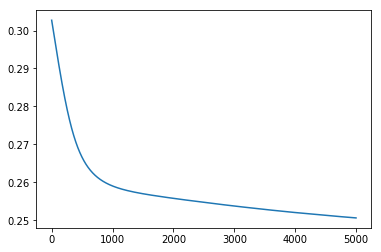

In [22]:
plt.plot(errors)
plt.show()

In [ ]:
# todo: plot